In [50]:
import pandas as pd
import numpy as np
import os
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100 )
pd.set_option('display.max_rows',500 )

In [51]:
base_df = pd.read_csv('ssd2_active.csv')

In [52]:
base_df.head()

,user_id,day,variantName,order_code,category_name,subcategory_name,user_flag,gsv1,gmv1,margin_v1,units,gppb1,promo_v,promo_v_on,promo_v_pass
0,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPN63912,Munchies,Chips & Crisps,Pass User,122.0,180.0,69.220551,1,50.945648,10.8,43.2,0.0
1,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPN63912,Frozen Food & Ice Creams,Roti & Paratha,Pass User,79.0,79.0,24.494499,1,37.189402,0.0,0.0,0.0
2,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPJ97682,Home Needs,Cleaning Aids,Pass User,182.0,249.0,139.489643,2,84.849566,0.0,68.8,0.0
3,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPJ97682,"Dairy, Bread & Eggs",Eggs,Pass User,84.0,103.0,40.566216,1,26.678954,0.0,0.0,0.0
4,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPJ97682,Fruits & Vegetables,Fresh Vegetables,Pass User,175.0,222.0,117.401684,3,83.116714,0.0,0.0,0.0


In [53]:
base_df['promo'] = base_df['promo_v'] + base_df['promo_v_on'] + base_df['promo_v_pass']
base_df.head()

,user_id,day,variantName,order_code,category_name,subcategory_name,user_flag,gsv1,gmv1,margin_v1,units,gppb1,promo_v,promo_v_on,promo_v_pass,promo
0,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPN63912,Munchies,Chips & Crisps,Pass User,122.0,180.0,69.220551,1,50.945648,10.8,43.2,0.0,54.0
1,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPN63912,Frozen Food & Ice Creams,Roti & Paratha,Pass User,79.0,79.0,24.494499,1,37.189402,0.0,0.0,0.0,0.0
2,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPJ97682,Home Needs,Cleaning Aids,Pass User,182.0,249.0,139.489643,2,84.849566,0.0,68.8,0.0,68.8
3,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPJ97682,"Dairy, Bread & Eggs",Eggs,Pass User,84.0,103.0,40.566216,1,26.678954,0.0,0.0,0.0,0.0
4,0005432c-8caf-4b82-8d73-cc6dd532df12,2024-06-30,Test2,B28FAHKPJ97682,Fruits & Vegetables,Fresh Vegetables,Pass User,175.0,222.0,117.401684,3,83.116714,0.0,0.0,0.0,0.0


In [54]:
group_df1 = base_df.groupby(['day','variantName'])['gmv1'].sum().reset_index()
group_df1.head()

,day,variantName,gmv1
0,2024-06-29,Test1,2342709.38
1,2024-06-29,Test2,4924980.42
2,2024-06-29,control,9075019.01
3,2024-06-30,Test1,3113655.06
4,2024-06-30,Test2,6003835.39


In [55]:
import matplotlib.pyplot as plt

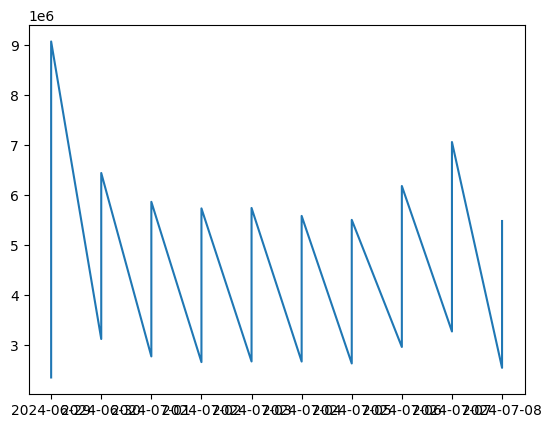

In [56]:
plt.plot(group_df1['day'],group_df1['gmv1'])
plt.show()

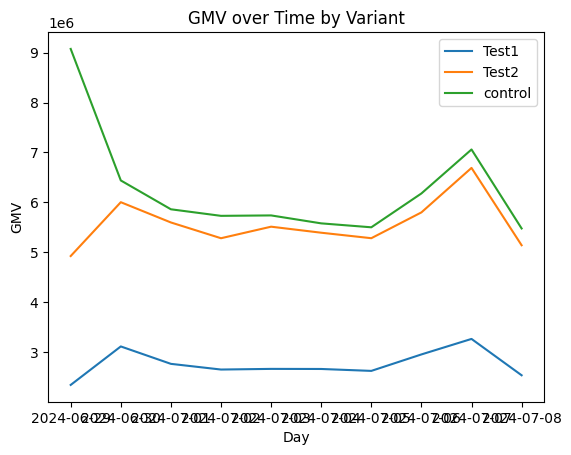

In [57]:
df_pivot = group_df1.pivot(index='day', columns='variantName', values='gmv1')

# Plot each variant
plt.plot(df_pivot.index, df_pivot['Test1'], label='Test1')
plt.plot(df_pivot.index, df_pivot['Test2'], label='Test2')
plt.plot(df_pivot.index, df_pivot['control'], label='control')

# Add title and labels
plt.title('GMV over Time by Variant')
plt.xlabel('Day')
plt.ylabel('GMV')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [58]:
df_pivot

variantName,Test1,Test2,control
day,,,
2024-06-29,2342709.38,4924980.42,9075019.01
2024-06-30,3113655.06,6003835.39,6439650.90
2024-07-01,2764875.15,5597692.60,5861815.22
2024-07-02,2650932.20,5281991.19,5730388.70
2024-07-03,2663973.28,5513160.77,5738987.10
2024-07-04,2662218.92,5392390.81,5579771.26
2024-07-05,2623821.78,5282450.99,5500959.53
2024-07-06,2953703.06,5799530.54,6179114.81
2024-07-07,3264423.00,6691136.72,7060280.98


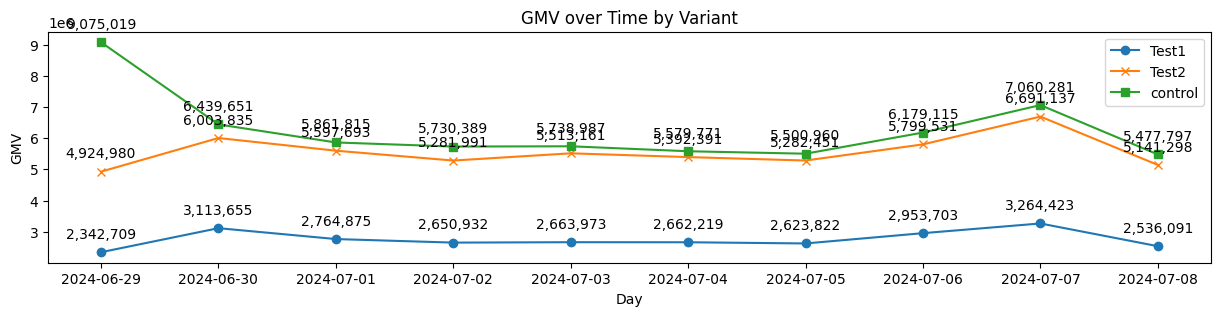

In [59]:
plt.figure(figsize=(15,3))
plt.plot(df_pivot.index, df_pivot['Test1'], label='Test1', marker='o')
plt.plot(df_pivot.index, df_pivot['Test2'], label='Test2', marker='x')
plt.plot(df_pivot.index, df_pivot['control'], label='control', marker='s')
plt.legend()

for i in range(len(df_pivot)):
    plt.annotate(f'{df_pivot["Test1"][i]:,.0f}', (df_pivot.index[i], df_pivot['Test1'][i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{df_pivot["Test2"][i]:,.0f}', (df_pivot.index[i], df_pivot['Test2'][i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{df_pivot["control"][i]:,.0f}', (df_pivot.index[i], df_pivot['control'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('GMV over Time by Variant')
plt.xlabel('Day')
plt.ylabel('GMV')
plt.show()

In [60]:
def category_case(ls):
    if ls['category_name'] == 'Fruits & Vegetables' :
        return 'FnV'
    else:
        return 'FMCG'


In [61]:
base_df['category_flag'] = base_df.apply(category_case, axis = 1)

In [62]:
results = base_df.groupby(['day','variantName']).agg(
    order_count = pd.NamedAgg(column='order_code',aggfunc=lambda x: x.nunique()),
    user_count = pd.NamedAgg(column='user_id',aggfunc=lambda x: x.nunique()),
    fnv_orders = pd.NamedAgg(column='order_code', aggfunc= lambda x: x[base_df['category_flag'] == 'FnV' ].nunique()),
    fmcg_orders = pd.NamedAgg(column='order_code', aggfunc= lambda x: x[base_df['category_flag'] != 'FnV' ].nunique()),
    gmv_sum = pd.NamedAgg(column='gmv1', aggfunc= lambda x: x.sum()),
    fnv_gmv_sum = pd.NamedAgg(column='gmv1', aggfunc= lambda x: x[base_df['category_flag'] == 'FnV'  ].sum()),
    fmcg_gmv_sum = pd.NamedAgg(column='gmv1', aggfunc= lambda x: x[base_df['category_flag'] != 'FnV'  ].sum()),
    gsv_sum = pd.NamedAgg(column='gsv1', aggfunc= lambda x: x.sum()),
    fnv_gsv_sum = pd.NamedAgg(column='gsv1', aggfunc= lambda x: x[base_df['category_flag'] == 'FnV'  ].sum()),
    fmcg_gsv_sum = pd.NamedAgg(column='gsv1', aggfunc= lambda x: x[base_df['category_flag'] != 'FnV'  ].sum()),
    margin_sum = pd.NamedAgg(column='margin_v1', aggfunc= lambda x: x.sum()),
    fnv_margin_sum = pd.NamedAgg(column='margin_v1', aggfunc= lambda x: x[base_df['category_flag'] == 'FnV'  ].sum()),
    fmcg_margin_sum = pd.NamedAgg(column='margin_v1', aggfunc= lambda x: x[base_df['category_flag'] != 'FnV'  ].sum()),
    units_sum = pd.NamedAgg(column='units', aggfunc= lambda x: x.sum()),
    fnv_units_sum = pd.NamedAgg(column='units', aggfunc= lambda x: x[base_df['category_flag'] == 'FnV'  ].sum()),
    fmcg_units_sum = pd.NamedAgg(column='units', aggfunc= lambda x: x[base_df['category_flag'] != 'FnV'  ].sum()),
    promo_sum = pd.NamedAgg(column='promo', aggfunc= lambda x: x.sum()),
    fnv_promo_sum = pd.NamedAgg(column='promo', aggfunc= lambda x: x[base_df['category_flag'] == 'FnV'  ].sum()),
    fmcg_promo_sum = pd.NamedAgg(column='promo', aggfunc= lambda x: x[base_df['category_flag'] != 'FnV'  ].sum())
).reset_index()

In [63]:
results['aov'] = results['gmv_sum']/results['order_count']
results['fnv_aov'] = results['fnv_gmv_sum']/results['order_count']
results['fmcg_aov'] = results['fmcg_gmv_sum']/results['order_count']

results['asp'] = results['gsv_sum']/results['order_count']
results['fnv_asp'] = results['fnv_gsv_sum']/results['order_count']
results['fmcg_asp'] = results['fmcg_gsv_sum']/results['order_count']

results['units_per_order'] = results['units_sum']/results['order_count']
results['fnv_units_per_order'] = results['fnv_units_sum']/results['order_count']
results['fmcg_units_per_order'] = results['fmcg_units_sum']/results['order_count']

In [64]:
results['new_gsv'] = results['gsv_sum'] + results['promo_sum']
results['fnv_new_gsv'] = results['fnv_gsv_sum'] + results['fnv_promo_sum']
results['fmcg_new_gsv'] = results['fmcg_gsv_sum'] + results['fmcg_promo_sum']

results['net_margin'] = (results['new_gsv'] - (results['gmv_sum'] - results['margin_sum']))/results['new_gsv']
results['fnv_net_margin'] = (results['fnv_new_gsv'] - (results['fnv_gmv_sum'] - results['fnv_margin_sum']))/results['fnv_new_gsv']
results['fmcg_net_margin'] = (results['fmcg_new_gsv'] - (results['fmcg_gmv_sum'] - results['fmcg_margin_sum']))/results['fmcg_new_gsv']

In [65]:
df_pivot_v1 = results.pivot(index='day', columns='variantName', values=['gmv_sum','order_count','net_margin','aov','asp','user_count'])

In [66]:
df_pivot_v1

gmv_sum                         order_count                    \
variantName       Test1       Test2     control       Test1    Test2  control   
day                                                                             
2024-06-29   2342709.38  4924980.42  9075019.01      4901.0   9819.0  17812.0   
2024-06-30   3113655.06  6003835.39  6439650.90      6069.0  12202.0  12344.0   
2024-07-01   2764875.15  5597692.60  5861815.22      5597.0  11363.0  11809.0   
2024-07-02   2650932.20  5281991.19  5730388.70      5519.0  11071.0  11641.0   
2024-07-03   2663973.28  5513160.77  5738987.10      5488.0  11416.0  11478.0   
2024-07-04   2662218.92  5392390.81  5579771.26      5575.0  11151.0  11580.0   
2024-07-05   2623821.78  5282450.99  5500959.53      5491.0  11268.0  11509.0   
2024-07-06   2953703.06  5799530.54  6179114.81      6034.0  12065.0  12345.0   
2024-07-07   3264423.00  6691136.72  7060280.98      6545.0  13365.0  13774.0   
2024-07-08   2536090.80  5141297.57  5477796.78      5513.0  11157.0  11381.0   

            net_margin                             aov              \
variantName      Test1     Test2   control       Test1       Test2   
day                                                                  
2024-06-29    0.208995  0.196124  0.196072  478.006403  501.576578   
2024-06-30    0.212981  0.208186  0.196115  513.042521  492.036993   
2024-07-01    0.218651  0.206326  0.197973  493.992344  492.624536   
2024-07-02    0.214705  0.208795  0.195010  480.328357  477.101544   
2024-07-03    0.209823  0.211490  0.197832  485.417872  482.932793   
2024-07-04    0.213209  0.206869  0.197563  477.528057  483.579124   
2024-07-05    0.211284  0.209000  0.198715  477.840426  468.801117   
2024-07-06    0.214782  0.208547  0.198149  489.509954  480.690472   
2024-07-07    0.213862  0.209358  0.196548  498.765928  500.646219   
2024-07-08    0.214444  0.204865  0.199147  460.020098  460.813621   

                                asp                         user_count  \
variantName     control       Test1       Test2     control      Test1   
day                                                                      
2024-06-29   509.489053  387.909006  398.343825  400.949445     4384.0   
2024-06-30   521.682672  409.208189  394.314521  413.584332     5488.0   
2024-07-01   496.385403  391.087567  392.292399  391.663403     5164.0   
2024-07-02   492.259144  391.186345  384.320481  391.207288     5088.0   
2024-07-03   499.998876  393.325915  384.985025  395.836201     5083.0   
2024-07-04   481.845532  390.079105  385.868668  383.028343     5150.0   
2024-07-05   477.970243  388.664076  378.587175  380.319506     5023.0   
2024-07-06   500.535829  397.015598  386.508932  391.730284     5489.0   
2024-07-07   512.580295  403.233343  399.204851  404.215059     5923.0   
2024-07-08   481.310674  374.181977  366.962807  383.497644     5046.0   

                               
variantName    Test2  control  
day                            
2024-06-29    8829.0  16053.0  
2024-06-30   11073.0  11215.0  
2024-07-01   10432.0  10804.0  
2024-07-02   10238.0  10727.0  
2024-07-03   10514.0  10647.0  
2024-07-04   10294.0  10586.0  
2024-07-05   10304.0  10496.0  
2024-07-06   10982.0  11271.0  
2024-07-07   12121.0  12539.0  
2024-07-08   10149.0  10500.0